# **Part 1: Awaken, Sleeper Agents!**

In [25]:
import string

class Node():
  """
  This class is a representation of a Binary Search Tree. It is characterized
  by its root/data and nodes to its left and right.
  """
  def __init__(self, data):
    self.left = None
    self.right = None
    self.data = data

  def insert(self, data: str) -> None:
    """
    This method inserts a new node to the BST by comparing if it is less than
    or greater than the root node. Returns None.
    """
    if self.data:
      if data < self.data:
        if self.left is None:
          self.left = Node(data)
        else:
          self.left.insert(data)
      elif data > self.data:
        if self.right is None:
          self.right = Node(data)
        else:
          self.right.insert(data)
    else:
      self.data = data

  def DFS(self, target: str) -> str:
    """
    Allows the program to traverse the tree using Depth-First Search. Traversal
    will stop once the input target is reached and it will be returned as a string.
    """
    if self.data == target:
      return target

    # if target is less than the root, perform DFS on its left
    if target < self.data:
        return self.left.DFS(target)

    # otherwise, perform DFS on its right
    elif target > self.data:
        return self.right.DFS(target)

In [26]:
def chain_communicate(host:str, receiver:str) -> list:
  """
  This function takes two string inputs: host and receiver. It will output a list
  of strings that show the chain of agents from host to receiver. This function
  changes the host string one character at a time to be identical to the receiver
  using the Node class and its DFS method.
  """
  alphabet = list(string.ascii_uppercase)
  out = [host]
  i = 0
  while out[-1] != receiver:
    # set the root/data of the Node instance as the current letter
    tree = Node(out[-1][i])
    for l in alphabet:
      tree.insert(l)
    # update the host by replacing the letter that was set as the root
    host = host[:i] + tree.DFS(receiver[i]) + host[i+1:]
    out.append(host)
    i += 1
  return out

In [27]:
print(chain_communicate('CORE', 'MBID'))
print(chain_communicate('RSYS', 'LOGS'))
print(chain_communicate('AAAA', 'LBJK'))

['CORE', 'MORE', 'MBRE', 'MBIE', 'MBID']
['RSYS', 'LSYS', 'LOYS', 'LOGS']
['AAAA', 'LAAA', 'LBAA', 'LBJA', 'LBJK']


A Binary Search Tree (BST) was used to solve Part 1 of the MP, utilizing Depth-first Search (DFS) to traverse the tree and process the current node. BST was utilized since the number of nodes was relatively small (26 letters of the alphabet) and searching through this structure would be simple due to the nature of the BST (only have to know if target is less than or more than the root node).

The while loop in chain_communicate() runs while the receiver is not in the output list. Inside the loop, an insert operation is done n times, and each insert is O(h) where h is the height of the BST. So, the insert can be seen as O(nh). The DFS traversal at the worst-case can be O(n) since we may travel to the deepest node during search. Thus, the inside of the while loop has time complexity O(nh + n). If the while loop runs n times, **we expect that the code for this part of the MP is O(n^2)**.



# **Part 2: CORE is the Center**

In [28]:
class Graph():
  """
  This class is the representation of a graph data structure. It is characterized
  by its edge and adjacency lists.
  """
  def __init__(self) -> None:
    self.num_edges = 0
    self.edges = []
    self.adjacency_list = {}
    self.visited = {}
    self.weights = {}

  def add_edge(self, n1: str, n2: str, weight: int) -> None:
    """
    This method takes in 3 inputs: 2 strings for the two nodes connected by the edge, and the weight.
    Appends the three items as a three-element tuple to the edges property of the object and adds one
    to the number of edges. Returns none.
    """
    self.edges.append((n1, n2, weight))
    self.num_edges += 1

  def create_adj_list(self) -> None:
    """
    This method takes no inputs. Puts all codes/nodes (key) in the edge list into a dictionary with
    value as empty lists. Also puts the nodes (key) in the visited dictionary with default value as
    false. Creates the adjacency list based on the edges and puts into the dictionary.
    """
    for edge in self.edges:
      self.adjacency_list[edge[0]] = []
      self.adjacency_list[edge[1]] = []
      self.visited[edge[0]] = False
      self.visited[edge[1]] = False

    # For each agent connection, append the destination agent and the weight to the source agent
    for src, dst, weight in self.edges:
      self.adjacency_list[src].append((dst, weight))

  def DFS(self, node: str) -> None:
    """
    Traverses the graph using Depth-First Search. Returns None.
    """
    self.visited[node] = True
    for neighbor in self.adjacency_list[node]:
      if neighbor[0] not in self.weights:
        self.weights[neighbor[0]] = neighbor[1]
      else:
        self.weights[neighbor[0]] += neighbor[1]

      if not self.visited[neighbor[0]]:
          self.DFS(neighbor[0])

  def update_weight(self) -> None:
    """
    This method is intended to be called once the graph has been traversed using DFS. Using the
    weights property of this class, this method updates the weights in the edge and adjacency lists
    while eliminating edges that are identical. Returns None.
    """
    updated_edges = list(set(self.edges))
    for i in range(len(updated_edges)):
      updated_edges[i] = (updated_edges[i][0], updated_edges[i][1], self.weights[updated_edges[i][1]])
    self.edges = updated_edges
    self.create_adj_list()

In [29]:
root = 'CORE'
proxy_agents = ['MBID', 'ADBY', 'BRNT', 'BIRD', 'OLJW',
                'BRKS', 'DRNT', 'PAUL', 'JRDN', 'CRRY',
                'JKIC', 'IRVN', 'WRTH', 'PIPN', 'TMPS',
                'MRRY', 'HRDN', 'JNSN', 'EWNG', 'TTUM',
                'BTLR', 'DNCN', 'LLRD', 'BRKL', 'GRNT']

g = Graph() # initialize an instance of a Graph object

# for each proxy agent, get the chain path from 'CORE' then create an edge list from it
for proxy in proxy_agents:
  weight = 40
  path = chain_communicate(root, proxy)
  edge_list = []

  for i in range(len(path) - 1):
      edge_list.append((path[i], path[i+1], weight))
      # if current agent is a proxy, automatically set weight to 10
      if i == len(path) - 3:
          weight = 10
      else:
          weight -= 10

      g.add_edge(edge_list[-1][0], edge_list[-1][1], edge_list[-1][2])

# once the edge list is created, create an adjacency list from it
g.create_adj_list()

# traverse the graph using DFS method to accumulate the weights according to MP specifications
g.DFS(root)

# update the edge and adjacency lists with the new accumulated weights
g.update_weight()

# print the edge list as the representation of the graph as the output for Part 2
print(g.edges)

[('CORE', 'IORE', 40), ('JORE', 'JKRE', 30), ('JORE', 'JRRE', 30), ('BORE', 'BTRE', 30), ('LLRE', 'LLRD', 10), ('MORE', 'MRRE', 50), ('JKIE', 'JKIC', 10), ('PORE', 'PARE', 30), ('CORE', 'MORE', 80), ('LORE', 'LLRE', 50), ('GORE', 'GRRE', 30), ('IRVE', 'IRVN', 10), ('MRRE', 'MRRY', 10), ('PARE', 'PAUE', 20), ('BRRE', 'BRNE', 20), ('BRNE', 'BRNT', 10), ('CORE', 'HORE', 40), ('MBIE', 'MBID', 10), ('JRDE', 'JRDN', 10), ('LLRE', 'LLRE', 50), ('GRNE', 'GRNT', 10), ('BTLE', 'BTLR', 10), ('AORE', 'ADRE', 30), ('BIRE', 'BIRE', 50), ('JRRE', 'JRDE', 20), ('PIPE', 'PIPN', 10), ('EWNE', 'EWNG', 10), ('OLJE', 'OLJW', 10), ('CORE', 'CRRE', 50), ('TMRE', 'TMPE', 20), ('ADRE', 'ADBE', 20), ('CORE', 'DORE', 80), ('BORE', 'BRRE', 90), ('OLRE', 'OLJE', 20), ('CORE', 'OORE', 40), ('HRDE', 'HRDN', 10), ('JNRE', 'JNSE', 20), ('CRRE', 'CRRE', 50), ('TTRE', 'TTUE', 20), ('WORE', 'WRRE', 30), ('CORE', 'CORE', 40), ('CORE', 'WORE', 40), ('JKRE', 'JKIE', 20), ('DNCE', 'DNCN', 10), ('IORE', 'IRRE', 30), ('TORE', 

For Part 2 of the MP, a graph structure was utilized to store the edges and adjacency lists. Since we are working with multiple paths from CORE to each of the proxy agents, keeping track of the chain of agents from source to destination begged for the usage of a graph. To solve the main problem in this part which is producing a graph with a directory of weightings, DFS was again utilized as a way of traversing the graph. This is beneficial as traversing the whole graph allowed us to process destination nodes and accumulate their weights. In the end, these accumulated weights can be used to update the graph's edge and adjacency lists.

For this part of the MP, we first see a layered for loop. The inner for loop runs n times. In this loop, an add_edge operation is performed which has a time complexity of O(1). Since all operations inside the loop are O(1), the time complexity of the inner loop is O(n). Inside the outer loop, chain_communicate() is called which has a time complexity of O(n^2) as said previously. Thus, the time complexity inside to outer loop is O(n^2 + n). If the outer loop runs n times, we can say it has a complexity of O(n^3). The create_adj_list() method can be seen as O(n) since it only iterates through each edge and performs O(1) operations. The update_weight() method is also O(n) given that it has one loop with O(1) operation inside, and the other operations outside the loop are also O(n). **All considered, the code for this part of the program is O(n^3).**

# **Part 3: CORE Sees It All**

In [30]:
# installing dependencies for data visualization

!pip install matplotlib --upgrade
!pip install numpy pandas --upgrade

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Agents with greatest/least pressure of maintaining communications**

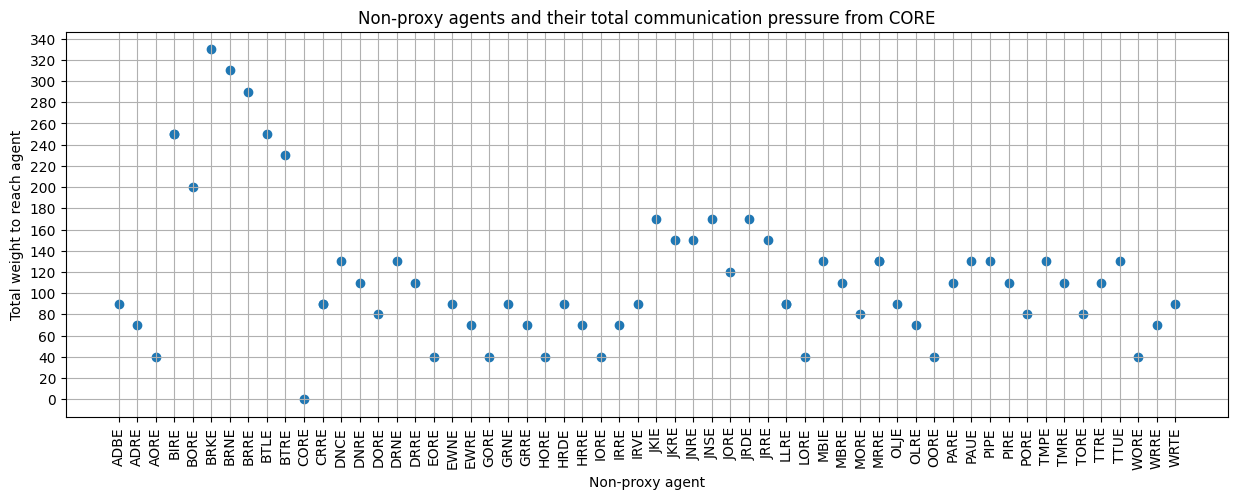

In [31]:
viz1 = []

nonproxy_agents = []
for edge in g.edges:
  if edge[1] not in proxy_agents:
    nonproxy_agents.append(edge[1])

for np_agent in nonproxy_agents:
  proxy_weight = 0
  path = chain_communicate(root, np_agent)
  for code in path[1:]:
    proxy_weight += g.weights[code]

  viz1.append((np_agent, proxy_weight))

viz1.sort()

plt.figure(figsize=(15,5))
plt.scatter(*zip(*viz1))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 350, 20))
plt.grid()
plt.ylabel('Total weight to reach agent')
plt.xlabel('Non-proxy agent')
plt.title('Non-proxy agents and their total communication pressure from CORE')
plt.show()

From the plot above, it can be observed that agent **BRKE had the greatest pressure** to maintain communication amongst all nonproxy agents, with a total weight of 330 units from the root CORE. On the opposite end of the spectrum, agents **AORE, CRRE, EORE, GORE, HORE, IORE, LORE, OORE, and WORE had the least pressure**, amounting to 40 units of accumulated weight.

**Proxy Agents with greatest/least pressure of maintaining communications**

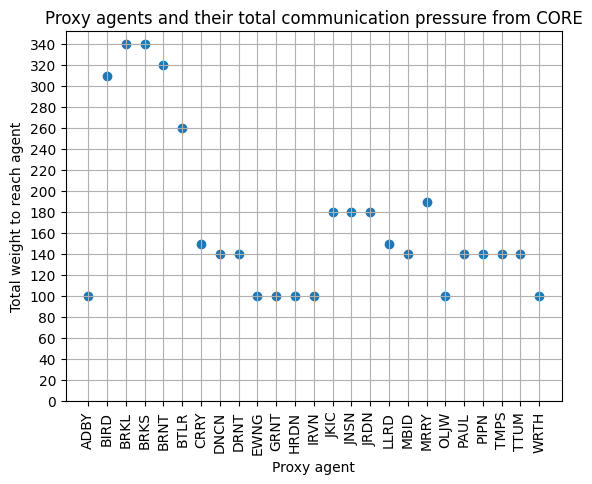

In [32]:
viz2 = []

for proxy in proxy_agents:
  proxy_weight = 0
  path = chain_communicate(root, proxy)
  for agent in path[1:]:
    proxy_weight += g.weights[agent]

  viz2.append((proxy, proxy_weight))

viz2.sort()

plt.scatter(*zip(*viz2))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 350, 20))
plt.grid()
plt.ylabel('Total weight to reach agent')
plt.xlabel('Proxy agent')
plt.title('Proxy agents and their total communication pressure from CORE')
plt.show()

From the plot above, it can be observed that agents **BRKS and BRKL had the greatest pressure** to maintain communication amongst all proxy agents, with a total weight of 340 units from the root CORE. On the opposite end of the spectrum, agent **CRRY had the least pressure**, amounting to 50 units of accumulated weight.

**Correlation between an agent's number of connections and their weight**

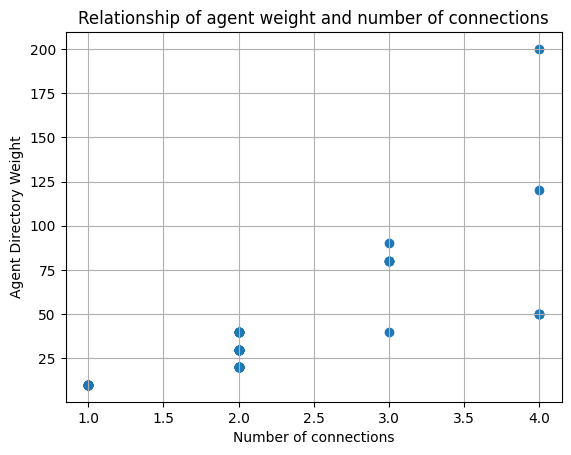

In [33]:
viz3 = []
num_connections = {}

for edge in g.edges:
  if edge[0] not in num_connections:
    num_connections[edge[0]] = 1
  else:
    num_connections[edge[0]] += 1

  if edge[1] not in num_connections:
    num_connections[edge[1]] = 1
  else:
    num_connections[edge[1]] += 1

for agent in num_connections:
  if agent != 'CORE':
    viz3.append((num_connections[agent], g.weights[agent]))

plt.scatter(*zip(*viz3))
plt.grid()
plt.ylabel('Agent Directory Weight')
plt.xlabel('Number of connections')
plt.title('Relationship of agent weight and number of connections')
plt.show()

From the plot, it can be observed that **agents with more connections generally have a higher weight in the agent directory**. As we look at the graph from left to right, a trend is seen where points become increasingly higher in the vertical axis.